<h1><font color="#113D68" size=6>Improving Deep Learning by Exploiting Synthetic Images</font></h1>

<h1><font color="#113D68" size=5>Part 2. Vision Transformers (ViT)</font></h1>

<h1><font color="#113D68" size=4>PyTorch</font></h1>

<br><br>
<div style="text-align: right">
<font color="#113D68" size=3>Manuel Castillo Cara</font><br>

</div>

---

<a id="indice"></a>
<h2><font color="#004D7F" size=5>Licencia</font></h2>

<p><small><small>Improving Deep Learning by Exploiting Synthetic Images Copyright 2024 Manuel Castillo Cara.</p>
<p><small><small> Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at </p>
<p><small><small> <a href="https://www.apache.org/licenses/LICENSE-2.0">https://www.apache.org/licenses/LICENSE-2.0</a> </p>
<p><small><small> Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License. </p>

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
El código de este tutorial ha sido sacado del [GitHub mildlyoverfitted](https://github.com/jankrepl/mildlyoverfitted/blob/master/github_adventures/vision_transformer/custom.py)

---

<a id="indice"></a>
<h2><font color="#004D7F" size=6>Índice</font></h2>

* [1. Definición, fortalezas y debilidades](#section1)
    * [1.1. Características de los Vision Transformer (ViT)](#section12)
    * [1.2. Fortalezas de los Vision Transformer (ViT)](#section12)
    * [1.3. Debilidades de los Vision Transformer (ViT)](#section13)
* [2. Dataset](#section2)
* [3. El Modelo ViT](#section3)
    * [3.1. Módulo Patch embedding](#section32)
    * [3.2. Módulo Multi-Head Attention](#section32)
    * [3.3. Módulo Transformer-Encoder](#section33)
    * [3.4. Módulo Vision Transformer](#section34)
* [4. Entrenamiento y evaluación del modelo](#section4)
    * [4.1. Especificaciones del entrenamiento](#section42)
    * [4.2. Entrenamiento](#section42)
    * [4.3. Validación](#section43)
* [5. Librería TIMM: Transfer learning y ajuste fino](#section5)
---

<a id="section1"></a>
# <font color="#004D7F" size=6> 1. Definición, fortalezas y debilidades</font>

Los Vision Transformer (ViT) son una adaptación del modelo Transformer, originalmente diseñado para tareas de procesamiento de lenguaje natural, aplicado a tareas de visión por computadora. En lugar de procesar secuencias de palabras, los ViT dividen una imagen en **patchs** y procesan estos patchs como **secuencias de tokens**. Al hacerlo, pueden capturar dependencias globales entre los patchs de la imagen y han demostrado ser eficaces en tareas como la clasificación de imágenes, la detección de objetos y más.

Algunas diferencias respecto a la clase Transformer-Encoder:
- Ahora solo conectamos a un MLP la primera salida, anteriormente conectaba todas las salidas.
- La arquitectura del encoder está modificada en las posiciones de las capas.

<figure><center>
  <img src="img/vit.png" width="550" height="350" alt="Gráfica">
  <figcaption><blockquote>Arquitectura de ViT y del Trasformer Encoder. Extraída de <a href="https://arxiv.org/abs/2010.11929">artículo de ViT</a></blockquote></figcaption>
</center></figure>

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Más información se recomienda la lectura del artículo [ViT](https://arxiv.org/abs/2010.11929)

<a id="section11"></a>
# <font color="#004D7F" size=5> 1.1. Características de los Vision Transformer (ViT)</font>

1. **División de imágenes en patchs**: ViT divide una imagen en múltiples patchs y los procesa como secuencias de tokens, lo que permite capturar dependencias globales entre los patchs.
2. **Uso de Transformers**: ViT utiliza el modelo Transformers, que se basa en la atención para procesar secuencias de entrada, en lugar de las redes neuronales convolucionales (CNN) tradicionales utilizadas en la visión por computadora.
3. **Preentrenamiento en grandes conjuntos de datos**: ViT se preentrena en grandes conjuntos de datos de imágenes, como ImageNet, lo que mejora su rendimiento en tareas posteriores de clasificación de imágenes.

<a id="section12"></a>
# <font color="#004D7F" size=5> 1.2. Fortalezas de los Vision Transformer (ViT)</font>

1. **Captura de dependencias globales**: Al dividir las imágenes en patchs y procesarlos como secuencias de tokens, ViT puede capturar dependencias globales entre los patchs de la imagen, lo que resulta en una mejor comprensión del contexto y la semántica de la imagen.
2. **Mejora del rendimiento en tareas de clasificación de imágenes**: ViT ha demostrado ser eficaz en tareas de clasificación de imágenes, superando a las redes neuronales convolucionales (CNN) tradicionales en algunos casos.
3. **Escalabilidad**: ViT puede escalarse fácilmente a conjuntos de datos más grandes y a tareas más complejas, lo que lo hace adecuado para su uso en aplicaciones de visión por computadora a gran escala.

<a id="section13"></a>
# <font color="#004D7F" size=5> 1.3. Debilidades de los Vision Transformer (ViT)</font>

1. **Requisitos de recursos computacionales**: ViT requiere una gran cantidad de recursos computacionales para el preentrenamiento y la inferencia, lo que puede ser un desafío para su implementación en dispositivos con recursos limitados.
2. **Necesidad de grandes conjuntos de datos**: ViT requiere grandes conjuntos de datos de imágenes para el preentrenamiento, lo que puede ser un desafío para su uso en aplicaciones donde los datos de entrenamiento son escasos.
3. **Falta de interpretabilidad**: A diferencia de las redes neuronales convolucionales (CNN), ViT no proporciona una representación espacial jerárquica de la imagen, lo que dificulta la interpretación de los resultados y la extracción de características locales.

<a id="section2"></a>
# <font color="#004D7F" size=6> 2. Dataset</font>

Cuando se preparan las imágenes para ser procesadas por un modelo de ViT, se dividen en múltiples patchs o *"tiles"* más pequeños. Este proceso se conoce como *"tiling"*. Cada patch se trata como un token independiente y se procesa como una secuencia de tokens, al igual que las palabras en una secuencia de texto.

Para realizar el *tiling*, se utiliza una capa convolucional. La capa convolucional se aplica directamente a la imagen de entrada y divide la imagen en patchs de un tamaño fijo, e.g., $16 \times 16$ píxeles. La capa convolucional también se utiliza para reproyectar los patchs en un espacio de dimensiones más bajo, lo que reduce la dimensionalidad de los datos y facilita el procesamiento posterior.

Una vez que se han dividido las imágenes en patchs y se han reproyectado en un espacio de dimensiones más bajo, se pueden procesar como secuencias de tokens y alimentar al modelo de Transformer. A nivel de conjunto de datos, simplemente se devuelven las imágenes y las etiquetas como de costumbre, sin necesidad de realizar ninguna preparación adicional de los datos.

In [3]:
import os
import random
import tensorflow as tf
import pytorch_lightning as pl
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F
from sklearn.datasets import fetch_openml
import numpy as np
from torch.utils.data import DataLoader

# SET RANDOM SEED FOR REPRODUCIBILITY
SEED = 420
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
#torch.backends.cudnn.deterministic = True
#torch.backends.cudnn.benchmark = False
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [2]:
class Dataset(torch.utils.data.Dataset):
  # El constructor de la clase, que toma dos argumentos: X e y, que representan los datos de entrada y las etiquetas, respectivamente
  def __init__(self, X, y):
    self.X = X
    self.y = y.astype('int')
  #Devuelve la longitud del conjunto de datos.
  def __len__(self):
    return len(self.X)
  # Devuelve un elemento del conjunto de datos en el índice especificado. 
  # En este caso, devuelve un tensor de PyTorch para los datos de entrada y las etiquetas correspondientes.
  def __getitem__(self, ix):
    return torch.tensor(self.X.iloc[ix]).float().view(1, 28, 28), torch.tensor(self.y.iloc[ix]).long()

class MNISTDataModule(pl.LightningDataModule):
    # El constructor de la clase, que toma un argumento: batch_size, que representa el tamaño del lote.
    def __init__(self, batch_size: int = 64):
        super().__init__()
        self.batch_size = batch_size
    # Este método se utiliza para configurar el conjunto de datos. 
    # En este caso, descarga el conjunto de datos MNIST utilizando la función fetch_openml de la biblioteca
    def setup(self, stage=None):
        mnist = fetch_openml('mnist_784', version=1)
        X, y = mnist["data"], mnist["target"]
        #X_train, X_test, y_train, y_test = X[:60000] / 255., X[60000:] / 255., y[:60000].astype(np.int), y[60000:].astype(np.int)
        # divide los datos en conjuntos de entrenamiento y validación, y crea instancias de la clase Dataset para cada conjunto de datos.
        X_train, X_test, y_train, y_test = X[:60000] / 255., X[60000:] / 255., y[:60000], y[60000:]
        self.train_ds = Dataset(X_train, y_train)
        self.val_ds = Dataset(X_test, y_test)
    # Este método devuelve un cargador de datos para el conjunto de entrenamiento/validación. 
    # En este caso, devuelve una instancia de la clase DataLoader de PyTorch, que es un iterador que devuelve 
    # lotes de datos del conjunto de entrenamiento/validación.
    # Poner el número de procesadores en num_workers (yo le pongo 11)
    def train_dataloader(self):
        return DataLoader(self.train_ds, batch_size=self.batch_size, shuffle=True)
    # 
    # Poner el número de procesadores en num_workers (yo le pongo 11)
    def val_dataloader(self):
        return DataLoader(self.val_ds, batch_size=self.batch_size)

- Crea un objeto `MNISTDataModule` llamado `dm`. La clase `MNISTDataModule` se utiliza para cargar y preparar el conjunto de datos MNIST.
- `dm.setup()` prepara el conjunto de datos. En este caso, la función `setup()` divide el conjunto de datos en un conjunto de entrenamiento y validación, y crea objetos `Dataset` correspondientes para cada uno de ellos.
- `imgs, labels = next(iter(dm.train_dataloader()))` obtiene un lote de imágenes y etiquetas del conjunto de entrenamiento. 
    - La función `train_dataloader()` devuelve un objeto `DataLoader` que carga lotes de datos del conjunto de entrenamiento. 
    - La función `iter()` se utiliza para crear un iterador a partir del objeto `DataLoader`, y 
    - La función `next()` se utiliza para obtener el primer lote de datos del iterador.
- `imgs.shape, labels.shape` imprime la forma de las imágenes y etiquetas del lote de datos cargado. La forma de las imágenes son `(batch_size, 1, 28, 28)`, donde:
    - `batch_size` es el tamaño del lote de datos cargado, 
    - `1` es el número de canales de la imagen (en este caso, las imágenes son en escala de grises), y 
    - `28 x 28` es el tamaño de la imagen en píxeles. 

In [3]:
dm = MNISTDataModule()
dm.setup()
imgs, labels = next(iter(dm.train_dataloader()))
imgs.shape, labels.shape

/var/folders/9h/d3b8zc6j5019cyvmb_h929xm0000gn/T/ipykernel_7173/1160272562.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return torch.tensor(self.X.iloc[ix]).float().view(1, 28, 28), torch.tensor(self.y.iloc[ix]).long()


(torch.Size([64, 1, 28, 28]), torch.Size([64]))

Accemos a una muestra de las imágenes.

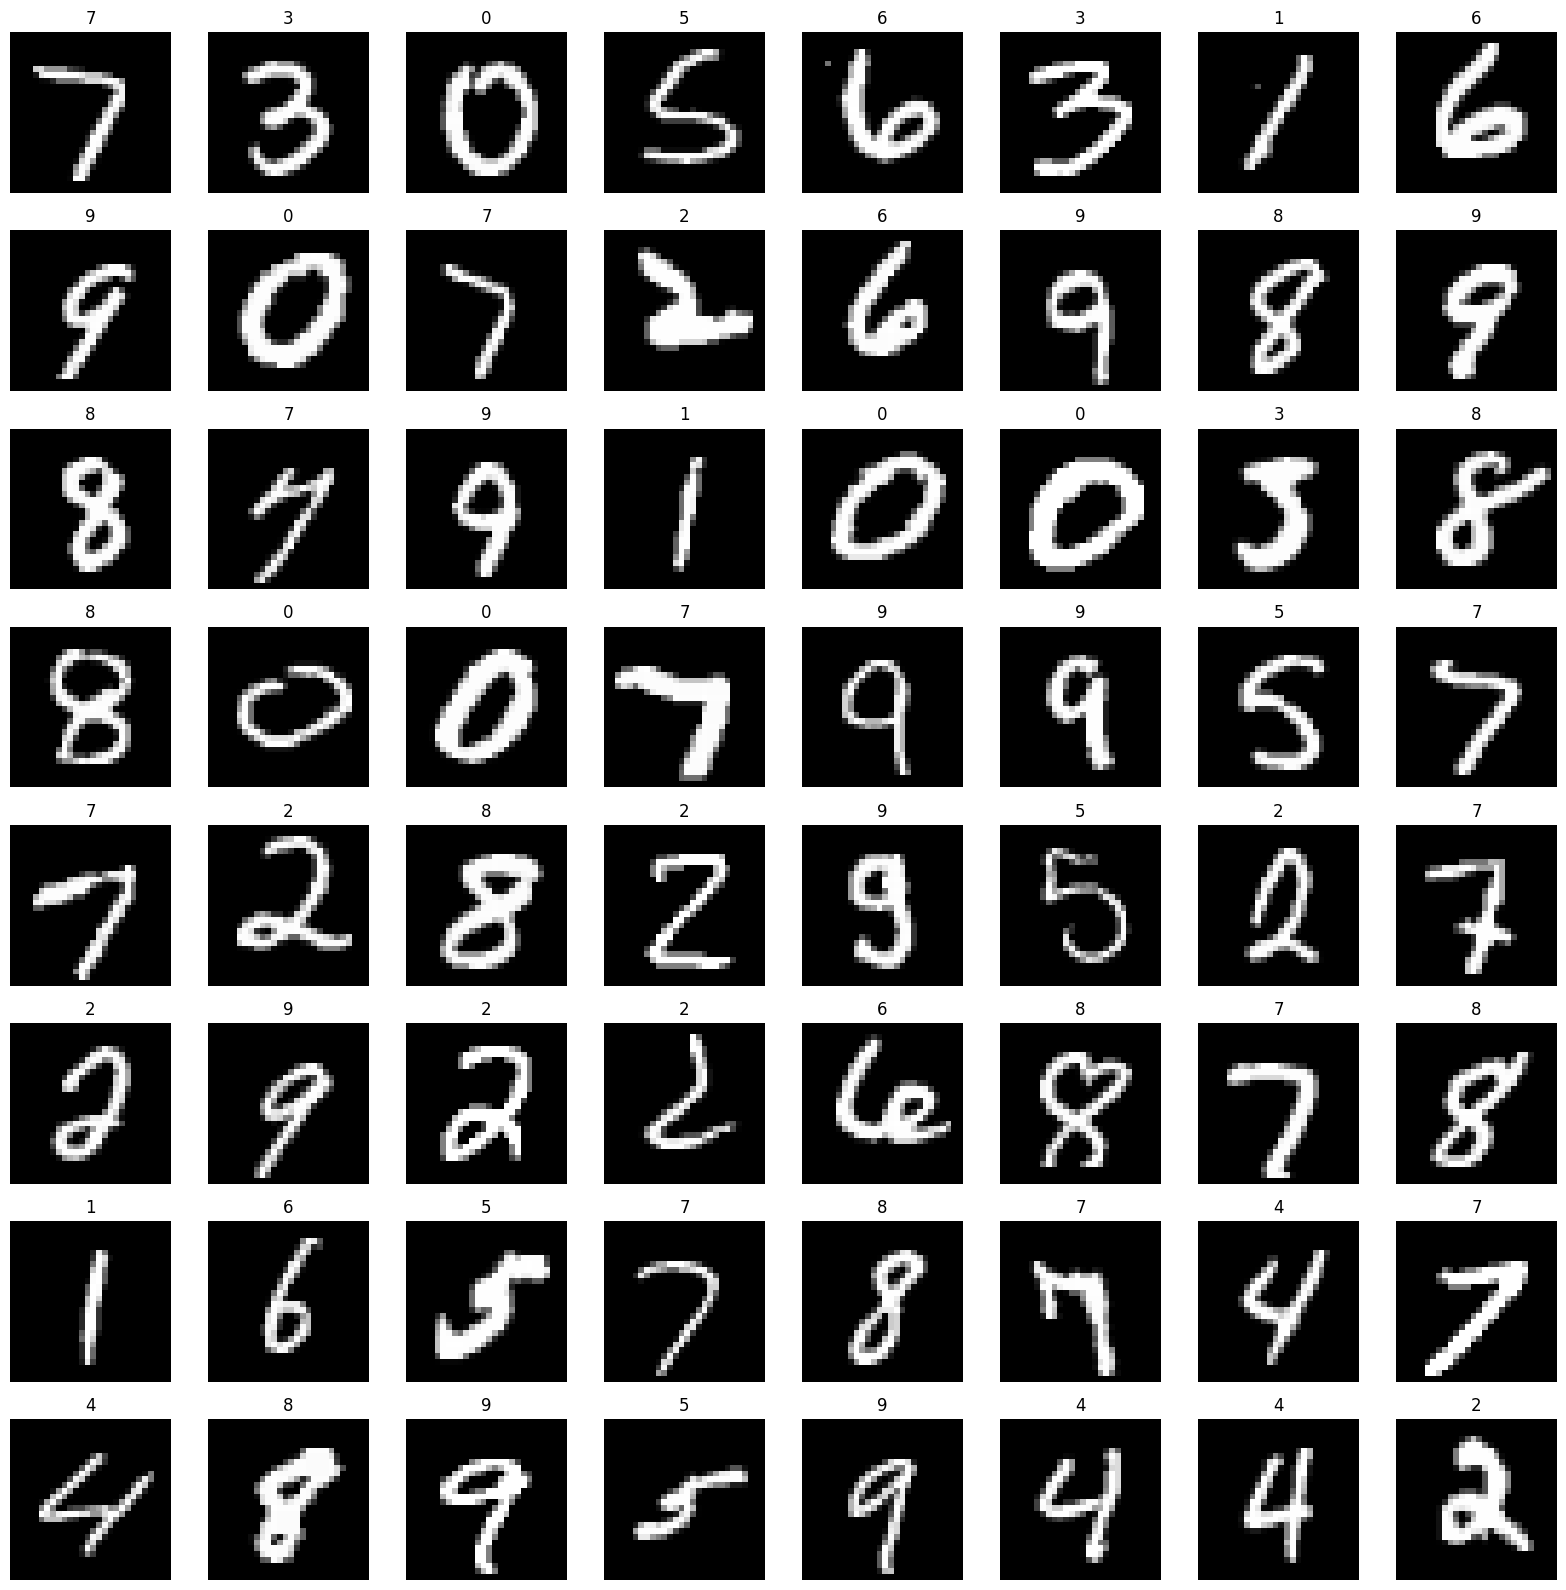

In [4]:
r, c = 8, 8
fig = plt.figure(figsize=(2*c, 2*r))
for _r in range(r):
    for _c in range(c):
        ix = _r*c + _c
        ax = plt.subplot(r, c, ix + 1)
        img, label = imgs[ix], labels[ix]
        ax.axis("off")
        ax.imshow(img.squeeze(0), cmap="gray")
        ax.set_title(label.item())
plt.tight_layout()
plt.show()

<a id="section3"></a>
# <font color="#004D7F" size=6> 3. El Modelo ViT</font>

<figure><center>
  <img src="img/procedimiento.png" width="450" height="850" alt="Gráfica">
  <figcaption><blockquote>Flujo de análisis de la imagen in ViT. Extraída de <a href="https://dkamatblog.home.blog/2021/08/05/vision-transformers-vit/">Divya's blog</a></blockquote></figcaption>
</center></figure>

<a id="section31"></a>
# <font color="#004D7F" size=5> 3.1. Módulo Patch embedding</font>

El módulo de *patch embedding* es el encargado de dividir una imagen en pequeños trozos o *patches* y proyectarlos en un espacio de dimensionalidad menor para poder ser procesados por el Transformer. En otras palabras, el módulo de *patch embedding* convierte una imagen en una secuencia de tokens que pueden ser procesados por el transformer.

Para implementar el módulo de *patch embedding*, podemos utilizar una capa convolucional con un tamaño de *kernel* y *stride* iguales al tamaño del *patch* que queramos utilizar. Por ejemplo, si queremos dividir una imagen en *patches* de 16x16 píxeles, podemos utilizar una capa convolucional con un tamaño de *kernel* y *stride* igual a 16.

La capa convolucional aplicará un filtro a la imagen de entrada para extraer características locales y generar una representación más compacta de cada *patch*. El número de filtros de la capa convolucional determinará la dimensionalidad de la representación de cada *patch*. Por ejemplo, si utilizamos 64 filtros, cada *patch* será proyectado a una representación de 64 dimensiones.

Una vez que hemos aplicado la capa convolucional a la imagen de entrada, obtenemos una secuencia de tokens que representan los diferentes *patches* de la imagen. Esta secuencia de tokens se utilizará como entrada al Transformer.

Es importante mencionar que, en la implementación del módulo de *patch embedding*, también debemos tener en cuenta la posición de cada *patch* en la imagen original. Para ello, podemos utilizar una codificación de posición que se añadirá a la representación de cada *patch*. La codificación de posición proporciona información adicional al Transformer sobre la posición de cada *patch* en la imagen original, lo que puede mejorar el rendimiento del modelo en tareas de visión por computadora.

<figure><center>
  <img src="img/patch_embedding.png" width="850" height="200" alt="Gráfica">
  <figcaption><blockquote>Arquitectura de ViT - Patch embedding. Extraída de <a href="https://arxiv.org/abs/2010.11929">Aman Arora's Blog</a></blockquote></figcaption>
</center></figure>

Por tanto el siguiente código:
- La clase `PatchEmbedding` utiliza una capa convolucional (`nn.Conv2d`) para proyectar los *patches* de la imagen de entrada a una representación de dimensionalidad menor. 
    - La capa convolucional tiene un tamaño de *kernel* y *stride* iguales al tamaño del *patch* (en este caso, 7x7 píxeles). 
    El número de filtros de la capa convolucional es igual a la dimensionalidad de la representación de cada *patch* (en este caso, 100 dimensiones).
- La función `forward` de la clase `PatchEmbedding` toma una entrada `x` de tamaño `(B, in_chans, img_size, img_size)`, donde `B` es el tamaño del lote de imágenes. 
    - La función aplica la capa convolucional a la entrada y luego aplana la salida en una matriz de tamaño `(B, embed_dim, n_patches)`, donde `n_patches` es el número total de *patches* en la imagen de entrada. 
    - Finalmente, la función transpone la matriz para obtener una salida de tamaño `(B, n_patches, embed_dim)`.

In [5]:
import torch.nn as nn

# https://github.com/jankrepl/mildlyoverfitted/blob/master/github_adventures/vision_transformer/custom.py

class PatchEmbedding(nn.Module):
    def __init__(self, img_size, patch_size, in_chans, embed_dim):
        super().__init__()
        self.img_size = img_size
        self.patch_size = patch_size
        self.n_patches = (img_size // patch_size) ** 2
        self.patch_size = patch_size
        # Ahora utilizamos una Convolucional para aplicar la transformación lineal a todos los parches
        self.proj = nn.Conv2d(in_chans, embed_dim, kernel_size=patch_size, stride=patch_size)

    def forward(self, x):
        x = self.proj(x)  # (B, E, P, P)
        x = x.flatten(2)  # (B, E, N)
        x = x.transpose(1, 2)  # (B, N, E)
        return x

Este código define la clase `PatchEmbedding`, que implementa el módulo de *patch embedding* descrito anteriormente. La clase toma cuatro argumentos de entrada:
* `img_size`: el tamaño de la imagen de entrada (en este caso, 28x28 píxeles)
* `patch_size`: el tamaño del *patch* (en este caso, 7x7 píxeles)
* `in_chans`: el número de canales de entrada (en este caso, 1 canal para imágenes en escala de grises)
* `embed_dim`: la dimensionalidad de la representación de cada *patch* (en este caso, 100 dimensiones)

1. Por tanto, se crea un objeto `PatchEmbedding` llamado `pe` con los parámetros especificados anteriormente. 
2. Luego, se llama a la función `forward` del objeto `pe` con la entrada `imgs` (que es un lote de imágenes cargado previamente) y se almacena la salida en la variable `out`. 
3. La forma de la salida `out` debería ser `(batch_size, n_patches, embed_dim)`, donde `batch_size` es el tamaño del lote de imágenes cargado, `n_patches` es el número total de *patches* en cada imagen y `embed_dim` es la dimensionalidad de la representación de cada *patch*.

In [6]:
pe = PatchEmbedding(28, 7, 1, 100)
out = pe(imgs)
out.shape

torch.Size([64, 16, 100])

<a id="section32"></a>
# <font color="#004D7F" size=5> 3.2. Módulo Multi-Head Attention</font>

En esta parte del código se define la clase `MultiHeadAttention` que implementa la atención múltiple (multi-head attention).

La clase `MultiHeadAttention` recibe dos parámetros de entrada: 
1. `n_embd` que es la dimensión de entrada y 
2. `n_heads` que es el número de cabezas de atención que se van a utilizar. 

Dentro de la clase se definen las proyecciones de clave (*key*), consulta (*query*) y valor (*value*), así como la proyección de salida. Estas proyecciones se implementan mediante capas lineales (`nn.Linear`) y se utilizan para transformar la entrada en las representaciones de clave, consulta y valor que se utilizarán en la atención.

La función `forward` recibe una entrada `x` de tamaño `(B, L, F)`, donde `B` es el tamaño del lote, `L` es la longitud de la secuencia y `F` es la dimensionalidad de la entrada. 
- La función calcula las representaciones de clave, consulta y valor para cada cabeza de atención utilizando las proyecciones definidas anteriormente. 
- Luego, la función calcula la atención mediante el producto punto de las matrices de consulta y clave, seguido de una normalización y una función softmax. 
- Finalmente, la salida se calcula como el producto punto de la matriz de atención y la matriz de valor, seguido de una reensamblada de las cabezas de atención y la proyección de salida.

<figure><center>
  <img src="img/head.jpeg" width="300" height="300" alt="Gráfica">
  <figcaption><blockquote>Multi-head attention. Extraída de <a href="https://arxiv.org/abs/2010.11929">artículo de ViT</a></blockquote></figcaption>
</center></figure>

In [7]:
import math

class MultiHeadAttention(nn.Module):

    def __init__(self, n_embd, n_heads):
        super().__init__()
        self.n_heads = n_heads

        # key, query, value projections
        self.key = nn.Linear(n_embd, n_embd*n_heads)
        self.query = nn.Linear(n_embd, n_embd*n_heads)
        self.value = nn.Linear(n_embd, n_embd*n_heads)

        # output projection
        self.proj = nn.Linear(n_embd*n_heads, n_embd)

    def forward(self, x):
        B, L, F = x.size()

        # calculate query, key, values for all heads in batch and move head forward to be the batch dim
        k = self.key(x).view(B, L, F, self.n_heads).transpose(1, 3) # (B, nh, L, F)
        q = self.query(x).view(B, L, F, self.n_heads).transpose(1, 3) # (B, nh, L, F)
        v = self.value(x).view(B, L, F, self.n_heads).transpose(1, 3) # (B, nh, L, F)

        # attention (B, nh, L, F) x (B, nh, F, L) -> (B, nh, L, L)
        att = (q @ k.transpose(-2, -1)) * (1.0 / math.sqrt(k.size(-1)))
        att = torch.nn.functional.softmax(att, dim=-1)
        y = att @ v # (B, nh, L, L) x (B, nh, L, F) -> (B, nh, L, F)
        y = y.transpose(1, 2).contiguous().view(B, L, F*self.n_heads) # re-assemble all head outputs side by side

        return self.proj(y)

<a id="section33"></a>
# <font color="#004D7F" size=5> 3.3. Módulo Transformer-Encoder</font>

`TransformerBlock` contiene la arquitectura básica del bloque de un transformer.

La clase `TransformerBlock` recibe dos parámetros de entrada: 
1. `n_embd` que es la dimensión de entrada y 
2. `n_heads` que es el número de cabezas de atención que se van a utilizar. 

Dentro de la clase se definen dos capas de normalización (`nn.LayerNorm`), una instancia de la clase `MultiHeadAttention` definida anteriormente y una red neuronal multicapa (`nn.Sequential`) que contiene dos capas lineales con una función de activación ReLU en medio.

La función `forward` recibe una entrada `x` de tamaño `(B, L, F)`, donde `B` es el tamaño del lote, `L` es la longitud de la secuencia y `F` es la dimensionalidad de la entrada. 
- La función aplica la atención múltiple y la red neuronal multicapa a la entrada, utilizando las capas de normalización para estabilizar el entrenamiento. 
- La salida de la función es la suma de la entrada y las salidas de la atención múltiple y la red neuronal multicapa.

<figure><center>
  <img src="img/encoder.png" width="150" height="250" alt="Gráfica">
  <figcaption><blockquote>Arquitectura de ViT - Transformer-Encoder. Extraída de <a href="https://arxiv.org/abs/2010.11929">Aman Arora's Blog</a></blockquote></figcaption>
</center></figure>

In [8]:
class TransformerBlock(nn.Module):
    def __init__(self, n_embd, n_heads):
        super().__init__()
        self.ln1 = nn.LayerNorm(n_embd)
        self.ln2 = nn.LayerNorm(n_embd)
        self.attn = MultiHeadAttention(n_embd, n_heads)
        self.mlp = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),
            nn.ReLU(),
            nn.Linear(4 * n_embd, n_embd),
        )

    def forward(self, x):
        # ahora aplicamos la normalización, luego la atención y el residual
        x = x + self.attn(self.ln1(x))
        x = x + self.mlp(self.ln2(x))
        return x

<a id="section34"></a>
# <font color="#004D7F" size=5> 3.4. Módulo Vision Transformer</font>


Siguiendo el trabajo de los autores originales, ya solo nos faltaría añadir el token `class` y los *postitional embeddings*. En implementaciones anteriores conectábamos la salida del Transformer a un clasificador lineal para darnos el resultado final. En *ViT*, sin embargo, se utiliza un token especial al principio de la secuencia, al cual conectamos nuestro clasificador final.

La clase `ViT` recibe varios parámetros de entrada, como el tamaño de la imagen, el tamaño del patch, el número de canales de entrada, la dimensión de la representación, el número de cabezas de atención, el número de capas del Transformer y el número de clases de salida.

Dentro de la clase se definen varios componentes importantes del modelo. En primer lugar, se define el módulo `patch_embed` que se encarga de dividir la imagen en patches y proyectarlos a la dimensión de la representación. Este módulo se define utilizando la clase `PatchEmbedding` definida anteriormente.

A continuación, se definen dos parámetros learnables: `cls_token` y `pos_embed`. 
- El parámetro `cls_token` es un token especial que se añade al principio de la secuencia de patches y que se utiliza para representar la clase de la imagen. Este token se expande para tener el mismo tamaño de lote que la entrada y se concatena con los patches en la dimensión de longitud. 
- El parámetro `pos_embed` es una representación de la posición de cada patch en la secuencia y se suma a la representación de los patches para proporcionar información sobre la posición.

El Transformer se define como una secuencia de bloques de Transformer (`TransformerBlock`) definidos anteriormente. Se utiliza la función `torch.nn.Sequential` para apilar varias capas de Transformer una después de otra.

Después del Transformer, se define una capa de normalización (`nn.LayerNorm`) y una capa lineal (`nn.Linear`) que se utiliza como clasificador final.

<figure><center>
  <img src="img/visionTransformer.png" width="500" height="300" alt="Gráfica">
  <figcaption><blockquote>Arquitectura de ViT - Modulos Transformer. Extraída de <a href="https://towardsdatascience.com/using-transformers-for-computer-vision-6f764c5a078b">Towards Data Science</a></blockquote></figcaption>
</center></figure>

---

La función `forward` de la clase `ViT` recibe una entrada `x` de tamaño `(B, C, H, W)`, donde `B` es el tamaño del lote, `C` es el número de canales de entrada, `H` es la altura de la imagen y `W` es la anchura de la imagen. 
- La función aplica primero el módulo `patch_embed` para obtener la representación de los patches. 
- Luego, se añade el token `cls` al principio de la secuencia y se suma la representación de la posición.
- La secuencia resultante se pasa a través del Transformer y se obtiene la representación final de la imagen. 
- La representación final se pasa a través de la capa de normalización y la capa lineal para obtener la salida final del modelo.

In [9]:
class ViT(nn.Module):

    def __init__(self, img_size=28, patch_size=7, in_chans=1, embed_dim=100, n_heads=3, n_layers=3, n_classes=10):
        super().__init__()

        self.patch_embed = PatchEmbedding(img_size, patch_size, in_chans, embed_dim)
        # El CLASS token de la primera entrada que conectará con el MLP clasificador
        self.cls_token = nn.Parameter(torch.zeros(1, 1, embed_dim))
        # El positional para saber en qué posición está cada parche
        self.pos_embed = nn.Parameter(torch.zeros(1, 1 + self.patch_embed.n_patches, embed_dim))

        self.tranformer = torch.nn.Sequential(*[TransformerBlock(embed_dim, n_heads) for _ in range(n_layers)])

        self.ln = nn.LayerNorm(embed_dim)
        self.fc = torch.nn.Linear(embed_dim, n_classes)

    def forward(self, x):
        e = self.patch_embed(x)
        B, L, E = e.size()

        cls_token = self.cls_token.expand(B, -1, -1)  # (B, 1, E)
        # Concatenamos los 16 parches con el parche adicional que hemos creado
        e = torch.cat((cls_token, e), dim=1)  # (B, 1 + N, E)
        e = e + self.pos_embed  # (B, 1 + N, E)

        z = self.tranformer(e)

        cls_token_final = z[:, 0]
        y = self.fc(cls_token_final)

        return y

En este código se crea una instancia del modelo `ViT` y se llama al método `forward` del modelo utilizando el lote de imágenes `imgs` como entrada. La salida del modelo se almacena en la variable `out`.

La forma de la salida `out` dependerá del número de clases de salida especificado en la inicialización del modelo `ViT`. En este caso, como se especificó `n_classes=10` en la inicialización del modelo, la salida `out` tendrá una forma de `(batch_size, 10)`, donde `batch_size` es el número de imágenes en el lote de entrada. Cada fila de la salida `out` corresponderá a la salida del modelo para una de las imágenes en el lote de entrada, y contendrá las probabilidades predichas para cada una de las 10 clases de salida.

In [10]:
vit = ViT()
out = vit(imgs)
out.shape

torch.Size([64, 10])

<a id="section4"></a>
# <font color="#004D7F" size=6> 4. Entrenamiento y evaluación del modelo</font>

<a id="section41"></a>
# <font color="#004D7F" size=5> 4.1. Especificaciones del entrenamiento</font>

Este código define una clase `Model` que hereda de la clase `pl.LightningModule` de PyTorch Lightning. Esta clase envuelve al modelo `ViT` definido anteriormente y agrega funcionalidades adicionales para el entrenamiento y la evaluación del modelo.

1. El método `__init__` de la clase `Model` inicializa una instancia del modelo `ViT`. El método `forward` simplemente llama al método `forward` del modelo `ViT` y devuelve su salida.
2. El método `predict` se utiliza para realizar predicciones con el modelo. Este método desactiva el cálculo de gradientes con `torch.no_grad()` y llama al método `forward` del modelo para obtener la salida. Luego, se utiliza la función `torch.argmax` para obtener los índices de las clases predichas y se devuelven como un tensor.
3. El método `compute_loss_and_acc` calcula la pérdida y accuracy del modelo en un lote de datos. Este método toma un lote de datos `batch` como entrada, llama al método `forward` del modelo para obtener la salida y calcula la pérdida utilizando la función `F.cross_entropy` de PyTorch. Luego, se utiliza la función `torch.argmax` para obtener los índices de las clases predichas y se comparan con los índices de las clases verdaderas para calcular el accuracy.
4. El método `training_step` se utiliza para realizar un paso de entrenamiento del modelo. Este método llama al método `compute_loss_and_acc` para calcular la pérdida y accuracy en un lote de datos de entrenamiento y registra estos valores utilizando el método `self.log` de PyTorch Lightning. Luego, se devuelve la pérdida para que el optimizador pueda actualizar los parámetros del modelo.
5. El método `validation_step` se utiliza para realizar un paso de evaluación del modelo. Este método funciona de manera similar al método `training_step`, pero se utiliza para calcular la pérdida y accuracy en un lote de datos de validación.
6. Finalmente, el método `configure_optimizers` se utiliza para configurar el optimizador del modelo. En este caso, se utiliza el optimizador Adam con una tasa de aprendizaje de 0.0003.

In [11]:
class Model(pl.LightningModule):

    def __init__(self):
        super().__init__()
        self.vit = ViT()

    def forward(self, x):
        return self.vit(x)

    def predict(self, x):
        with torch.no_grad():
          y_hat = self(x)
          return torch.argmax(y_hat, axis=1)

    def compute_loss_and_acc(self, batch):
        x, y = batch
        y_hat = self(x)
        loss = F.cross_entropy(y_hat, y)
        acc = (torch.argmax(y_hat, axis=1) == y).sum().item() / y.shape[0]
        return loss, acc

    def training_step(self, batch, batch_idx):
        loss, acc = self.compute_loss_and_acc(batch)
        self.log('loss', loss)
        self.log('acc', acc, prog_bar=True)
        return loss

    def validation_step(self, batch, batch_idx):
        loss, acc = self.compute_loss_and_acc(batch)
        self.log('val_loss', loss, prog_bar=True)
        self.log('val_acc', acc, prog_bar=True)

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=0.0003)
        return optimizer

En este código se crea una instancia del modelo `Model` definido anteriormente y se llama al método `forward` del modelo utilizando el lote de imágenes `imgs` como entrada. La salida del modelo se almacena en la variable `out`.

La forma de la salida `out` dependerá del número de clases de salida especificado en la inicialización del modelo `ViT` dentro de la clase `Model`. En este caso, como se especificó `n_classes=10` en la inicialización del modelo `ViT`, la salida `out` tendrá una forma de `(batch_size, 10)`, donde `batch_size` es el número de imágenes en el lote de entrada. Cada fila de la salida `out` corresponderá a la salida del modelo para una de las imágenes en el lote de entrada, y contendrá las probabilidades predichas para cada una de las 10 clases de salida.

In [12]:
model = Model()
out = model(imgs)
out.shape

torch.Size([64, 10])

<a id="section42"></a>
# <font color="#004D7F" size=5> 4.2. Entrenamiento</font>

En este código se crea una instancia del modelo `Model` definido anteriormente y se utiliza la biblioteca PyTorch Lightning para entrenar el modelo durante 5 épocas utilizando el conjunto de datos `dm` definido anteriormente.

1. La clase `pl.Trainer` de PyTorch Lightning se utiliza para entrenar el modelo. 
    - El parámetro `max_epochs` se establece en 5, lo que significa que el modelo se entrenará durante 5 épocas. 
    - El parámetro `logger` se establece en `None`, lo que significa que no se utilizará ningún registrador de métricas durante el entrenamiento.
2. El método `trainer.fit` se utiliza para entrenar el modelo utilizando el conjunto de datos `dm`.
3. Una vez que el entrenamiento se complete, el modelo entrenado se almacenará en la instancia de la clase `Model` y se podrá utilizar para realizar predicciones en nuevos datos utilizando el método `predict` del modelo.

In [13]:
model = Model()
#trainer = pl.Trainer(max_epochs=5, gpus=1, logger=None)
trainer = pl.Trainer(max_epochs=5, logger=None)
trainer.fit(model, dm)

[MacBook-Pro-de-Manu.local:07173] shmem: mmap: an error occurred while determining whether or not /var/folders/9h/d3b8zc6j5019cyvmb_h929xm0000gn/T//ompi.MacBook-Pro-de-Manu.501/jf.0/17367040/sm_segment.MacBook-Pro-de-Manu.501.1090000.0 could be created.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name | Type | Params
------------------------------
0 | vit  | ViT  | 613 K 
------------------------------
613 K     Trainable params
0         Non-trainable params
613 K     Total params
2.455     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/Users/manwest/Library/Python/3.9/lib/python/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/var/folders/9h/d3b8zc6j5019cyvmb_h929xm0000gn/T/ipykernel_7173/1160272562.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return torch.tensor(self.X.iloc[ix]).float().view(1, 28, 28), torch.tensor(self.y.iloc[ix]).long()


/Users/manwest/Library/Python/3.9/lib/python/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Epoch 4: 100%|██████████| 938/938 [04:59<00:00,  3.14it/s, v_num=3, acc=1.000, val_loss=0.0576, val_acc=0.983]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 938/938 [04:59<00:00,  3.14it/s, v_num=3, acc=1.000, val_loss=0.0576, val_acc=0.983]


<a id="section43"></a>
# <font color="#004D7F" size=5> 4.3. Validación</font>

Este código muestra una cuadrícula de 8x8 imágenes del conjunto de validación, con sus etiquetas verdaderas y predichas por el modelo.

/var/folders/9h/d3b8zc6j5019cyvmb_h929xm0000gn/T/ipykernel_7173/1160272562.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return torch.tensor(self.X.iloc[ix]).float().view(1, 28, 28), torch.tensor(self.y.iloc[ix]).long()


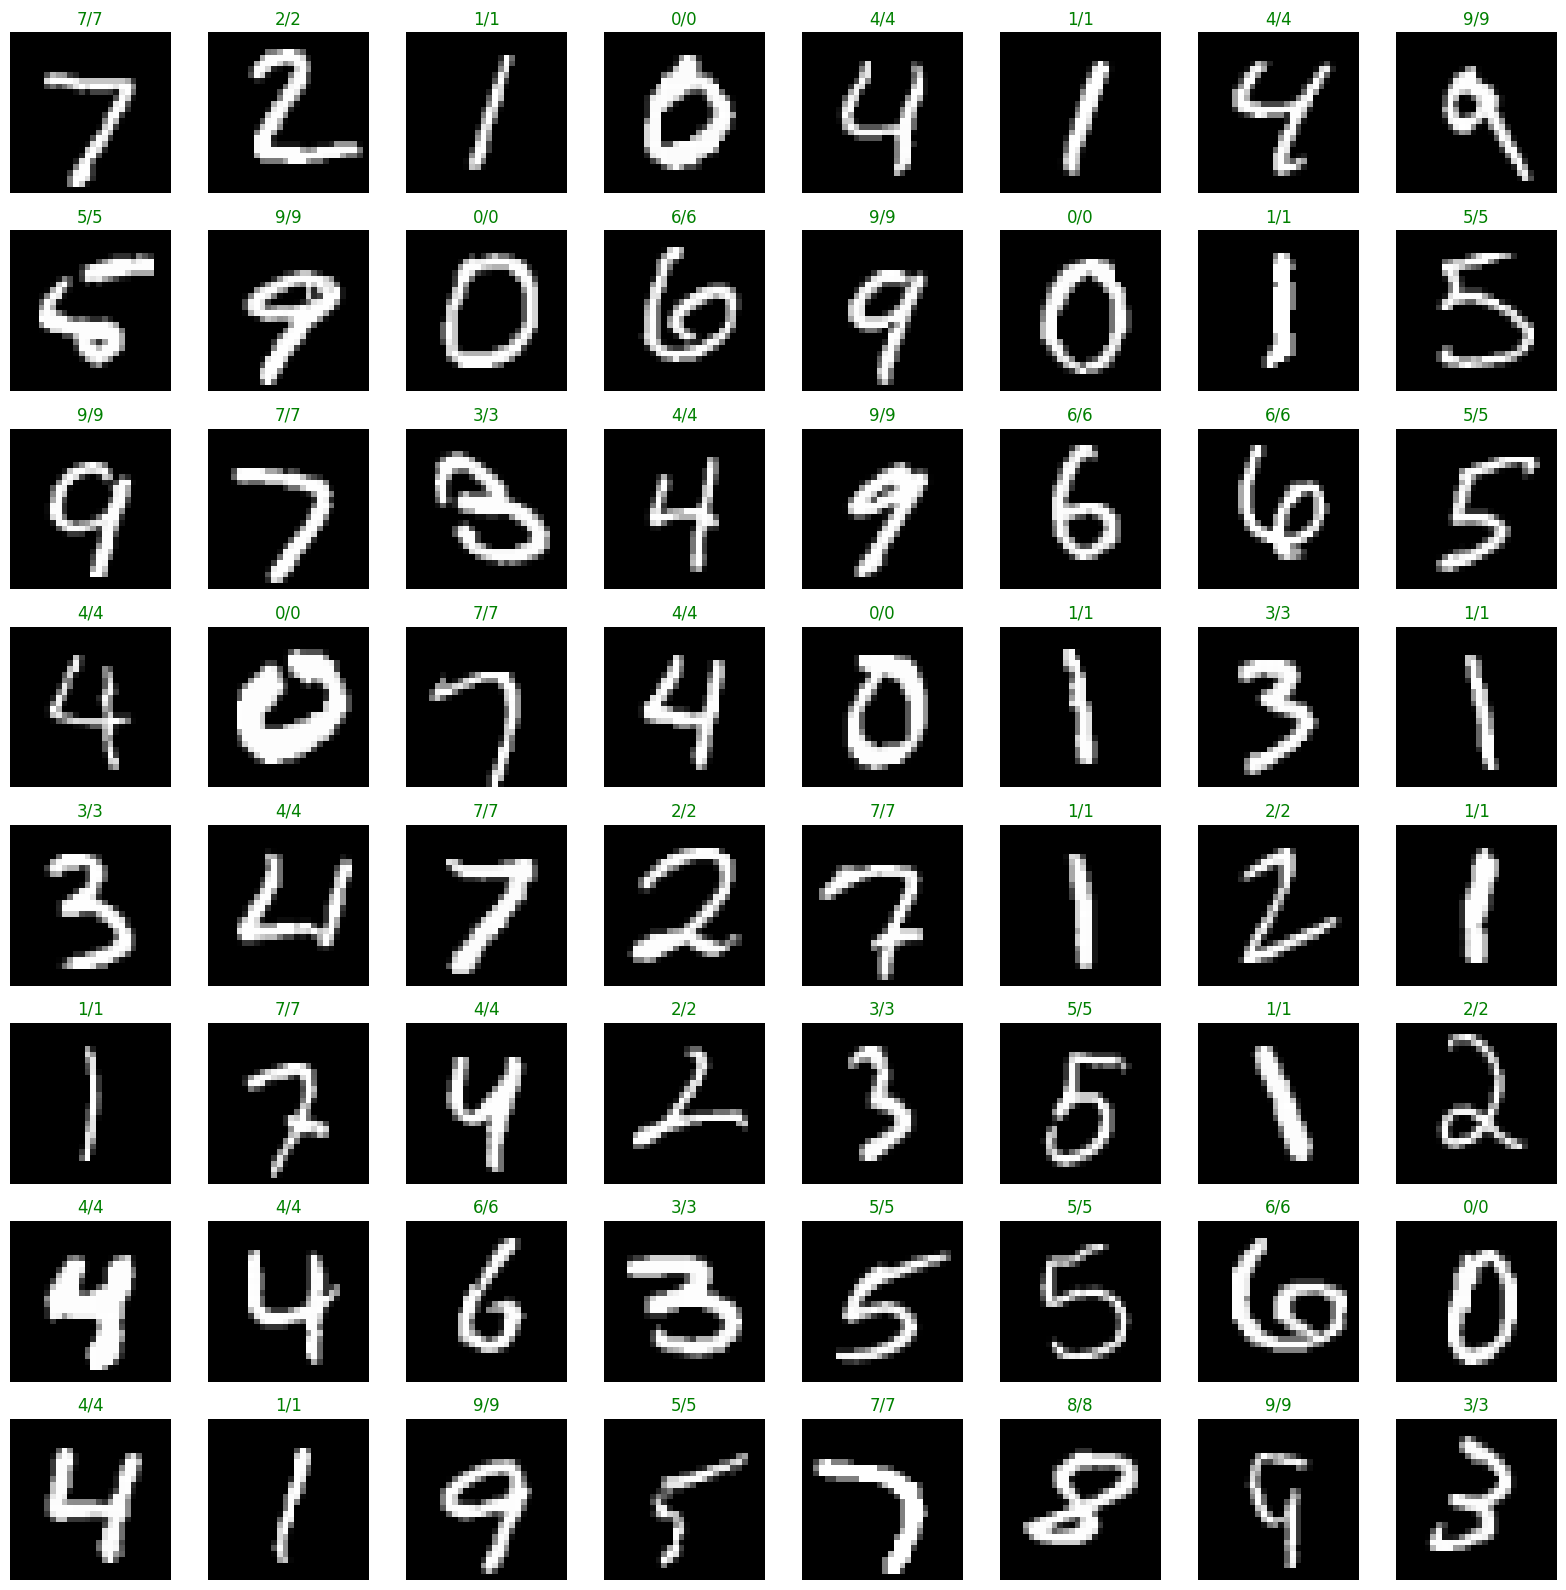

In [14]:
imgs, labels = next(iter(dm.val_dataloader()))
preds = model.predict(imgs)

r, c = 8, 8
fig = plt.figure(figsize=(2*c, 2*r))
for _r in range(r):
    for _c in range(c):
        ix = _r*c + _c
        ax = plt.subplot(r, c, ix + 1)
        img, label = imgs[ix], labels[ix]
        ax.axis("off")
        ax.imshow(img.reshape(28,28), cmap="gray")
        ax.set_title(f'{label.item()}/{preds[ix].item()}', color="green" if label == preds[ix] else 'red')
plt.tight_layout()
plt.show()

<a id="section5"></a>
# <font color="#004D7F" size=6> 5. Librería TIMM: Transfer learning y ajuste fino</font>

Si bien nuestra implementación es funcional, podemos utilizar otras que ya existan para asegurarnos que todo está bien implementado y optimizado. Una solución recomendable es usar la librería [timm](https://github.com/rwightman/pytorch-image-models).

Al utilizar el modelo `VisionTransformer` preentrenado proporcionado por la librería `timm`, se pueden aprovechar los pesos y la arquitectura del modelo previamente entrenados en grandes conjuntos de datos, lo que puede mejorar el rendimiento del modelo en tareas de clasificación de imágenes. Además, la librería `timm` proporciona una amplia variedad de modelos preentrenados para su uso en diferentes tareas de visión por computadora, lo que permite una gran flexibilidad y facilidad de uso.

La librería `timm` (Tencent Image Modeling toolkit) es una librería de Python para el procesamiento de imágenes y visión por computadora. Fue desarrollada por el equipo de investigación de inteligencia artificial de Tencent y proporciona una amplia gama de modelos de visión profunda preentrenados y herramientas para su uso en tareas de visión por computadora.
Algunas de las características clave de `timm` incluyen:
* Una amplia gama de modelos de visión profunda preentrenados, incluyendo modelos de ResNet, EfficientNet, Vision Transformer (ViT), y muchos otros.
* Herramientas para la transferencia de aprendizaje y el ajuste fino de modelos preentrenados para su uso en tareas específicas.
* Herramientas para la creación y el entrenamiento de modelos personalizados, incluyendo la capacidad de definir y entrenar modelos utilizando múltiples GPUs.
* Herramientas para la evaluación y el análisis de modelos, incluyendo la capacidad de calcular métricas de rendimiento y visualizar las representaciones aprendidas por los modelos.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Más información oficial sobre la librería [timm](https://github.com/huggingface/pytorch-image-models)

In [15]:
#!pip install timm

Este código importa la clase `VisionTransformer` desde la librería `timm` y define una nueva clase `Model2` que hereda de la clase `Model` previamente definida. La clase `Model2` sustituye el modelo `ViT` utilizado en la clase `Model` por un modelo `VisionTransformer` preentrenado proporcionado por la librería `timm`.

La clase `VisionTransformer` toma varios parámetros de configuración, como:
- El tamaño de la imagen de entrada (`img_size`), 
- el tamaño del patch (`patch_size`), 
- el número de canales de entrada (`in_chans`), 
- el número de clases de salida (`num_classes`), 
- la dimensión de incrustación (`embed_dim`), 
- la profundidad del modelo (`depth`) y 
- el número de cabezales de atención (`num_heads`).

En este caso, se configura el modelo `VisionTransformer` para procesar imágenes de 28x28 píxeles en escala de grises (`in_chans=1`), divididas en patches de 7x7 píxeles, con una dimensión de incrustación de 100, una profundidad de 3 capas y 2 head attention. 

In [16]:
from timm.models.vision_transformer import VisionTransformer

class Model2(Model):
    def __init__(self):
        super().__init__()
        self.vit = VisionTransformer(
            img_size=28,
            patch_size=7,
            in_chans=1,
            num_classes=10,
            embed_dim=100,
            depth=3,
            num_heads=2
        )

/Users/manwest/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
model2 = Model2()
out = model2(imgs)
out.shape

torch.Size([64, 10])

In [18]:
model2 = Model2()
#trainer = pl.Trainer(max_epochs=5, gpus=1, precision=16, logger=None)
trainer = pl.Trainer(max_epochs=5, precision=16, logger=None)
trainer.fit(model2, dm)

/Users/manwest/Library/Python/3.9/lib/python/site-packages/lightning_fabric/connector.py:558: `precision=16` is supported for historical reasons but its usage is discouraged. Please set your precision to 16-mixed instead!
Using 16bit Automatic Mixed Precision (AMP)


/Users/manwest/Library/Python/3.9/lib/python/site-packages/torch/cuda/amp/grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name | Type              | Params
-------------------------------------------
0 | vit  | VisionTransformer | 371 K 
-------------------------------------------
371 K     Trainable params
0         Non-trainable params
371 K     Total params
1.488     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/Users/manwest/Library/Python/3.9/lib/python/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/var/folders/9h/d3b8zc6j5019cyvmb_h929xm0000gn/T/ipykernel_7173/1160272562.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return torch.tensor(self.X.iloc[ix]).float().view(1, 28, 28), torch.tensor(self.y.iloc[ix]).long()


Sanity Checking DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]

/Users/manwest/Library/Python/3.9/lib/python/site-packages/torch/amp/autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


/Users/manwest/Library/Python/3.9/lib/python/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Epoch 4: 100%|██████████| 938/938 [04:50<00:00,  3.23it/s, v_num=4, acc=0.875, val_loss=0.180, val_acc=0.945]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 938/938 [04:50<00:00,  3.23it/s, v_num=4, acc=0.875, val_loss=0.180, val_acc=0.945]


En este caso la diferencia en número de parámetros y accuracy se debe a que, en la implementació original del *Transformer*, el cálculo de las *keys*, *queries* y *values* se divide entre las diferentes cabezas, mientras que en nuestra implementación (debido a la baja dimensionalidad del problema) las estamos multiplicando.

/var/folders/9h/d3b8zc6j5019cyvmb_h929xm0000gn/T/ipykernel_7173/1160272562.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return torch.tensor(self.X.iloc[ix]).float().view(1, 28, 28), torch.tensor(self.y.iloc[ix]).long()


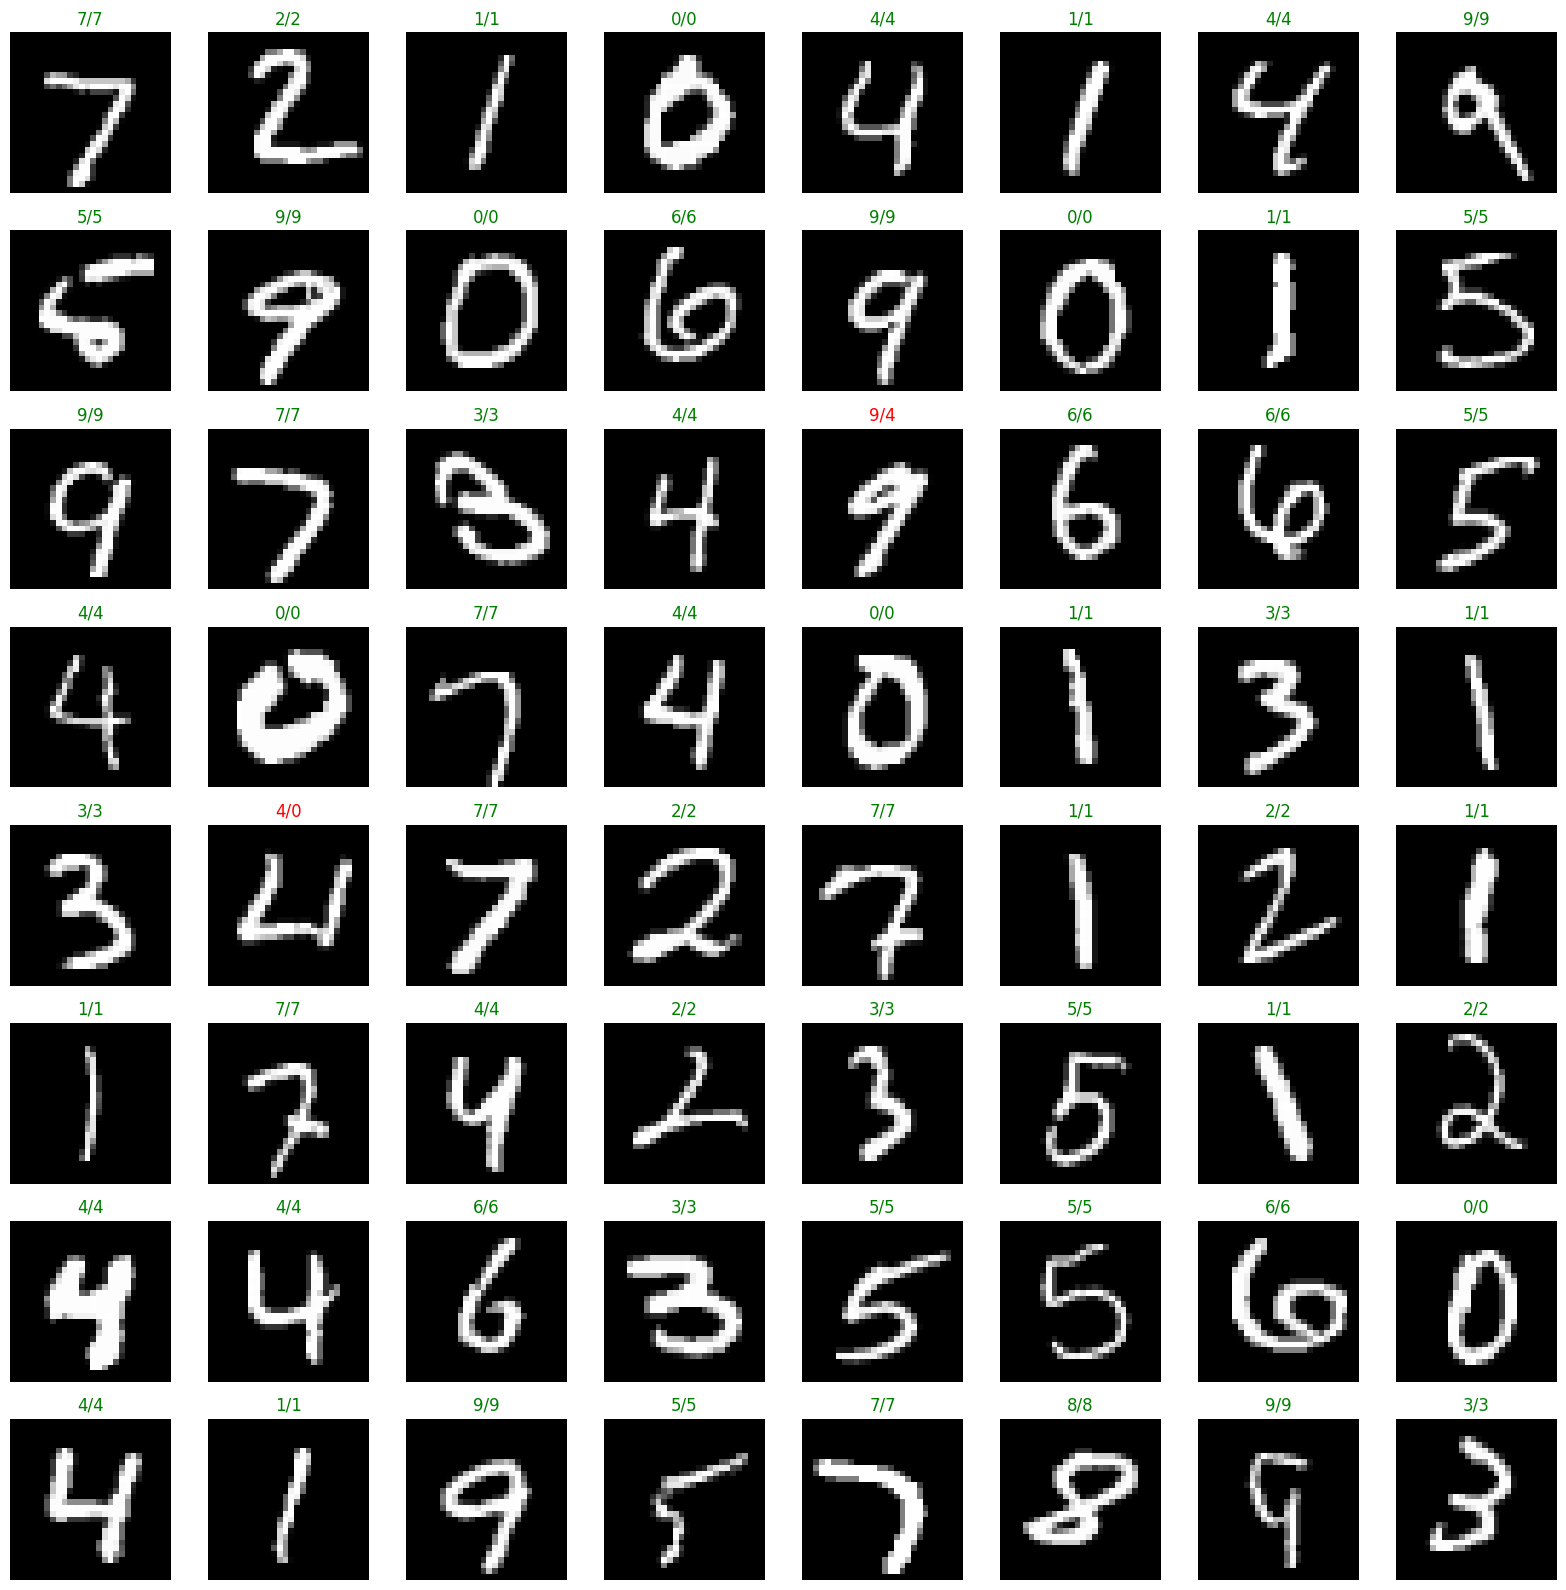

In [19]:
imgs, labels = next(iter(dm.val_dataloader()))
preds = model2.predict(imgs)

r, c = 8, 8
fig = plt.figure(figsize=(2*c, 2*r))
for _r in range(r):
    for _c in range(c):
        ix = _r*c + _c
        ax = plt.subplot(r, c, ix + 1)
        img, label = imgs[ix], labels[ix]
        ax.axis("off")
        ax.imshow(img.reshape(28,28), cmap="gray")
        ax.set_title(f'{label.item()}/{preds[ix].item()}', color="green" if label == preds[ix] else 'red')
plt.tight_layout()
plt.show()